In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [67]:
refdf = pd.read_excel('reference_10cc.xlsx')
ref99df = pd.read_excel( 'reference_pro99_axenic.xlsx')

In [7]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
#dpath = 'results'

os.listdir(dpath)

['baseline_29062023_df.csv.gz',
 'baseline_29062023_mse.csv.gz',
 'baseline_29062023_sum.csv.gz',
 'baseline_df.csv.gz',
 'baseline_mse.csv.gz',
 'baseline_sum.csv.gz',
 'het_lsq_MIN_df.csv.gz',
 'het_lsq_MIN_sum.csv.gz',
 'het_monte_MIN_df.csv.gz',
 'het_monte_MIN_mse.csv.gz',
 'het_monte_MIN_sum.csv.gz',
 'least_square_ponly_min_df.csv.gz',
 'least_square_ponly_min_sum.csv.gz',
 'param_sensitivity_29062023_df.csv.gz',
 'param_sensitivity_29062023_mse.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz',
 'param_sensitivity_pro99_df.csv.gz',
 'param_sensitivity_pro99_mse.csv.gz',
 'param_sensitivity_pro99_sum.csv.gz',
 'vpro_df.csv.gz',
 'vpro_mse.csv.gz',
 'vpro_sum.csv.gz']

In [8]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_mse.csv.gz' ))

In [89]:
vprosum_df = pd.read_csv(os.path.join(dpath,'vpro_sum.csv.gz' ))
vprodf =  pd.read_csv(os.path.join(dpath,'vpro_df.csv.gz' ))
vpromse_df = pd.read_csv(os.path.join(dpath,'vpro_mse.csv.gz' ))

In [90]:
# remove outlier
vprosum_df = vprosum_df.loc[~vprosum_df.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]
vprodf = vprodf.loc[~vprodf.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]
vpromse_df = vpromse_df.loc[~vpromse_df.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]


In [91]:

base1sum_df = basesum_df.loc[~basesum_df.run_id.str.contains('pro99')].copy()
base1df = basedf.loc[~basedf.run_id.str.contains('pro99')].copy()
base1mse_df = basemse_df.loc[~basemse_df.run_id.str.contains('pro99')].copy()

vpro1sum_df = vprosum_df.loc[~vprosum_df.run_id.str.contains('pro99')].copy()
vpro1df = vprodf.loc[~vprodf.run_id.str.contains('pro99')].copy()
vpro1mse_df = vpromse_df.loc[~vpromse_df.run_id.str.contains('pro99')].copy()


In [92]:

base2sum_df = basesum_df.loc[basesum_df.run_id.str.contains('pro99')].copy()
base2df = basedf.loc[basedf.run_id.str.contains('pro99')].copy()
base2mse_df = basemse_df.loc[basemse_df.run_id.str.contains('pro99')].copy()

vpro2sum_df = vprosum_df.loc[vprosum_df.run_id.str.contains('pro99')].copy()
vpro2df = vprodf.loc[vprodf.run_id.str.contains('pro99')].copy()
vpro2mse_df = vpromse_df.loc[vpromse_df.run_id.str.contains('pro99')].copy()


# baseline and vpro dfs

In [93]:
base1df.run_id.unique()

array(['baseline_ponly_FULL', 'baseline_ponly_LEAK',
       'baseline_ponly_MIXO', 'baseline_ponly_MIN'], dtype=object)

In [94]:
vpro1df[['idx', 'model', 'f_scale']] = vpro1df.run_id.str.split('_', expand=True)[[0,4,5]]
vpro1mse_df[['idx', 'model', 'f_scale']] = vpro1mse_df.run_id.str.split('_', expand=True)[[0,4,5]]
vpro1sum_df[['idx', 'model', 'f_scale']] = vpro1sum_df.run_id.str.split('_', expand=True)[[0,4,5]]


In [95]:
vpro2df[['idx', 'model', 'f_scale']] = vpro2df.run_id.str.split('_', expand=True)[[0,5,6]]
vpro2mse_df[['idx', 'model', 'f_scale']] = vpro2mse_df.run_id.str.split('_', expand=True)[[0,5,6]]
vpro2sum_df[['idx', 'model', 'f_scale']] = vpro2sum_df.run_id.str.split('_', expand=True)[[0,5,6]]


In [96]:
vpro1mse_df.idx.unique()

array(['vpro'], dtype=object)

In [97]:
base1df[['idx', 'model']] = base1df.run_id.str.split('_', expand=True)[[0,2]]
base1mse_df[['idx',  'model']] = base1mse_df.run_id.str.split('_', expand=True)[[0,2]]
base1sum_df[['idx',  'model']] = base1sum_df.run_id.str.split('_', expand=True)[[0,2]]


In [98]:
base2df[['idx', 'model']] = base2df.run_id.str.split('_', expand=True)[[0,3]]
base2mse_df[['idx',  'model']] = base2mse_df.run_id.str.split('_', expand=True)[[0,3]]
base2sum_df[['idx',  'model']] = base2sum_df.run_id.str.split('_', expand=True)[[0,3]]


In [99]:
base1mse_df.model.unique(),base2mse_df.model.unique(),

(array(['FULL', 'MIXO', 'MIN', 'LEAK'], dtype=object),
 array(['MIN', 'LEAK', 'MIXO', 'FULL'], dtype=object))

In [100]:
vpro1df['Media'] = 'lowN'
vpro1mse_df['Media'] = 'lowN'
vpro1sum_df['Media'] = 'lowN'
base1df['Media'] = 'lowN'
base1mse_df['Media'] = 'lowN'
base1sum_df['Media'] = 'lowN'


In [101]:
vpro2df['Media'] = 'highN'
vpro2mse_df['Media'] = 'highN'
vpro2sum_df['Media'] = 'highN'
base2df['Media'] = 'highN'
base2mse_df['Media'] = 'highN'
base2sum_df['Media'] = 'highN'


In [102]:
base1mse_df.idx.unique()

array(['baseline'], dtype=object)

In [103]:
df = pd.concat([base1df, vpro1df, base2df, vpro2df], ignore_index=True)
mse_df = pd.concat([base1mse_df, vpro1mse_df, base2mse_df, vpro2mse_df], ignore_index=True)
sum_df = pd.concat([base1sum_df, vpro1sum_df, base2sum_df, vpro2sum_df], ignore_index=True)


In [104]:
mse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [105]:
mse_df.run_id.value_counts()

baseline_ponly_FULL                        3
baseline_ponly_pro99_MIN                   3
baseline_ponly_pro99_MIXO                  3
baseline_ponly_pro99_FULL                  3
vpro_ponly_pro99_least_square_MIXO_1       3
vpro_ponly_pro99_least_square_MIXO_20      3
vpro_ponly_pro99_least_square_MIXO_10      3
vpro_ponly_pro99_least_square_MIXO_0.1     3
vpro_ponly_pro99_least_square_LEAK_0.1     3
vpro_ponly_pro99_least_square_MIN_1        3
vpro_ponly_pro99_least_square_LEAK_1       3
vpro_ponly_pro99_least_square_MIN_100      3
vpro_ponly_pro99_least_square_LEAK_0.01    3
vpro_ponly_pro99_least_square_MIN_0.1      3
vpro_ponly_pro99_least_square_MIN_20       3
vpro_ponly_pro99_least_square_LEAK_10      3
vpro_ponly_pro99_least_square_LEAK_100     3
vpro_ponly_pro99_least_square_MIN_10       3
vpro_ponly_pro99_least_square_MIN_0.01     3
baseline_ponly_pro99_LEAK                  3
vpro_ponly_least_square_LEAK_1             3
baseline_ponly_MIXO                        3
vpro_ponly

In [106]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'idx', 'model', 'Media', 'f_scale'],
      dtype='object')

In [107]:
mse_df.idx.value_counts()

vpro        99
baseline    24
Name: idx, dtype: int64

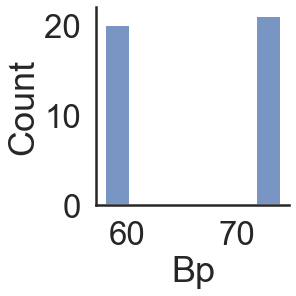

In [108]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [86]:
mse_df.nlargest(columns='MSE', n=20)

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,Media,f_scale
71,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,61946.444196,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
70,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,60259.822045,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
69,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,59117.262419,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
65,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,13577.856371,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
64,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,12669.362957,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
63,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,12330.590162,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
66,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,8223.519891,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
67,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,7745.919261,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
68,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,7198.016237,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
108,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,highN,20


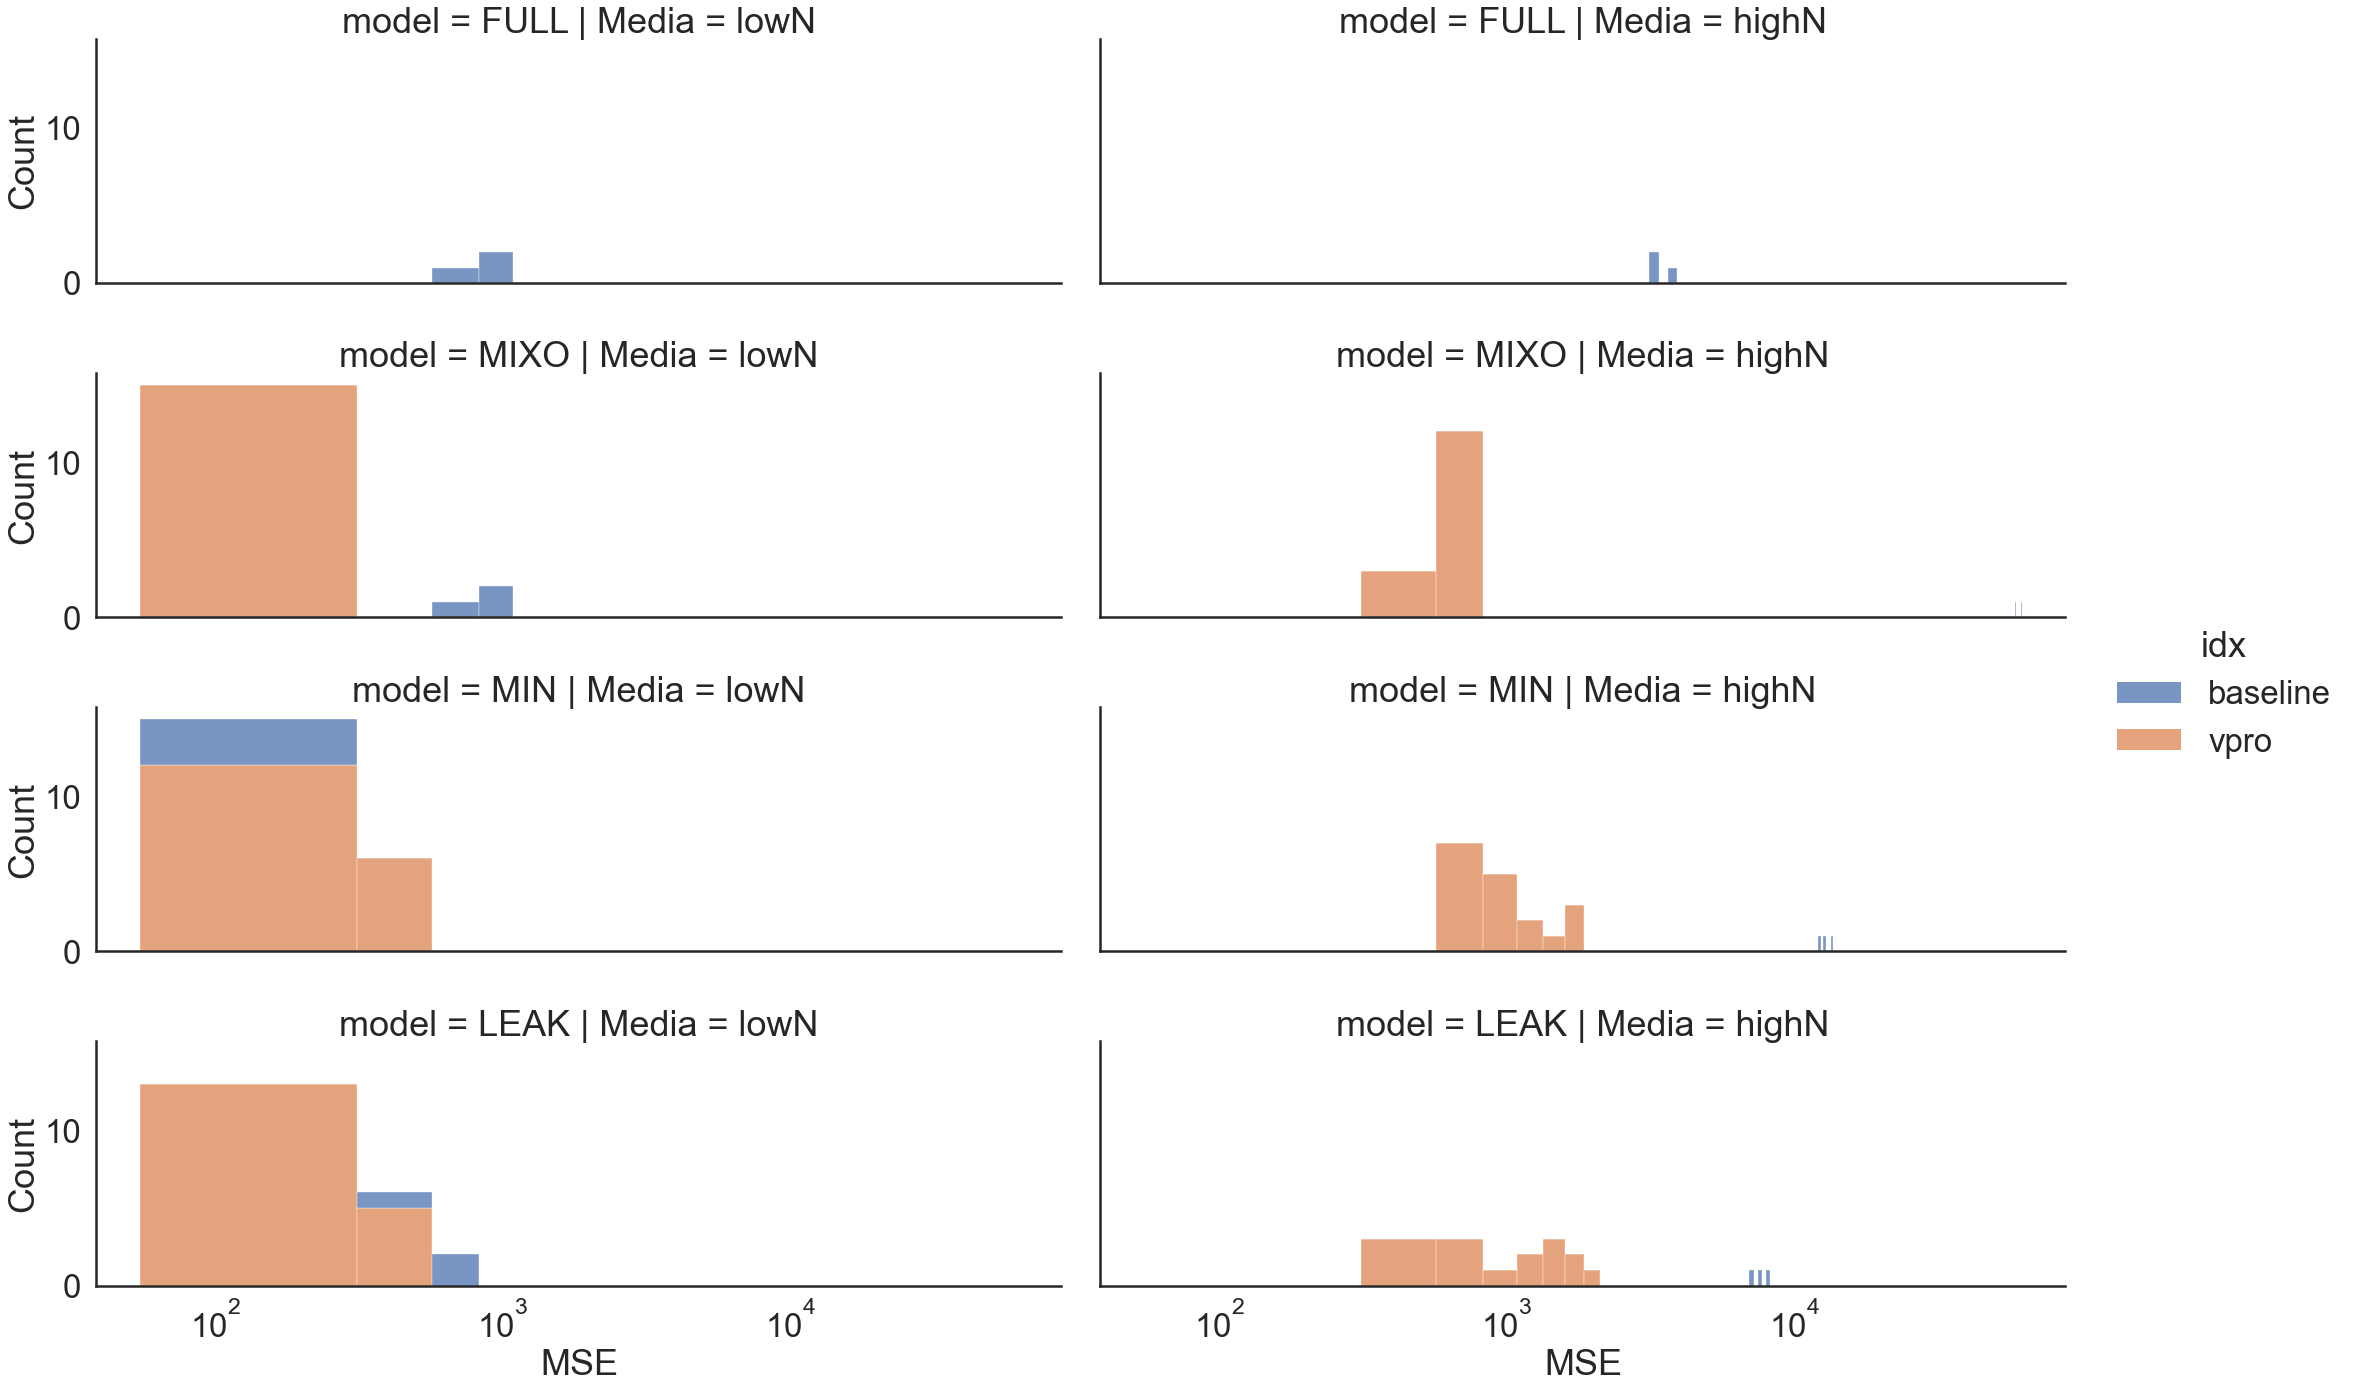

In [109]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='idx',multiple='stack' ,  col='Media')
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [57]:
df.min()

C:\Users\Osnat\AppData\Local\Temp\ipykernel_12092\3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Bp                        0.0
DON                  0.002532
RDON                      0.0
DIN                  0.000148
DOC                     132.5
RDOC                      0.0
DIC                  0.002388
ROS                  0.055182
ABp                       0.0
ABh                       0.0
t                         0.0
day                       0.0
Bp[C]                     0.0
ABp[C]                    0.0
ABh[C]                    0.0
run_id    baseline_ponly_FULL
idx                  baseline
model                    FULL
Media                   highN
dtype: object

In [58]:
mse_df.idx.value_counts()

vpro        102
baseline     24
Name: idx, dtype: int64

In [59]:
sns.color_palette('Dark2')

In [110]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

#all_df = pd.concat([df, basedf, vprodf], ignore_index=True)
min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']

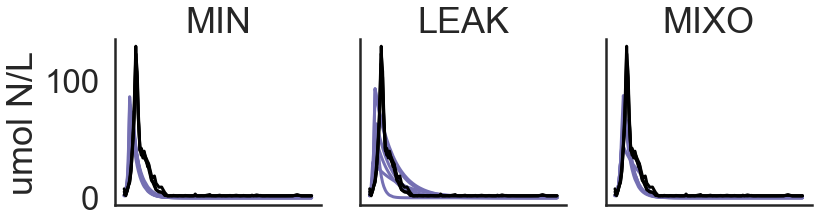

In [128]:
#base_df['model_'] = base_df['model_']
sns.set_context('poster', font_scale=1.5)
g = sns.relplot(
    data=df.loc[df.idx.isin(['vpro']) & df.Media.isin(['lowN'])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'idx', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
    aspect=0.8,
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L', xlabel='', xticks=[])


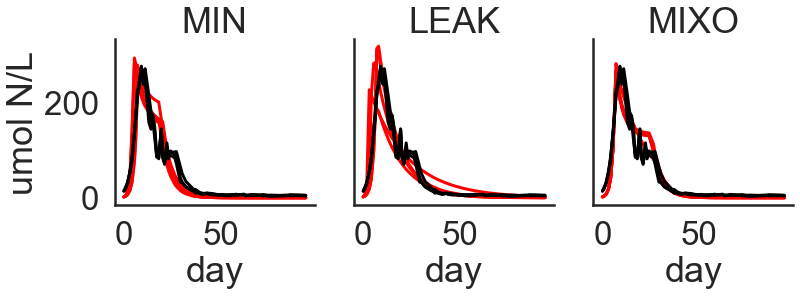

In [131]:
#base_df['model_'] = base_df['model_']

g = sns.relplot(
    data=df.loc[df.idx.isin(['vpro']) & df.Media.isin(['highN'])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'idx', #hue_order=morder[1:], 
    palette=['red'], legend=False, 
    aspect=0.8,
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=ref99df,
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
#g.set_titles(col_template='',)
g.set(ylabel='umol N/L')


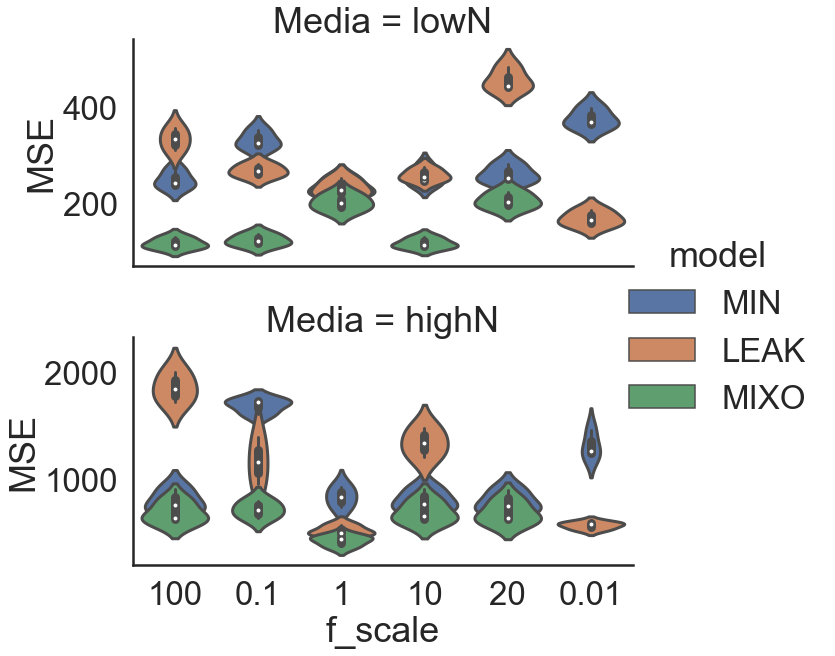

In [113]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model', row='Media', 
    sharey=False, kind='violin', dodge=False
)

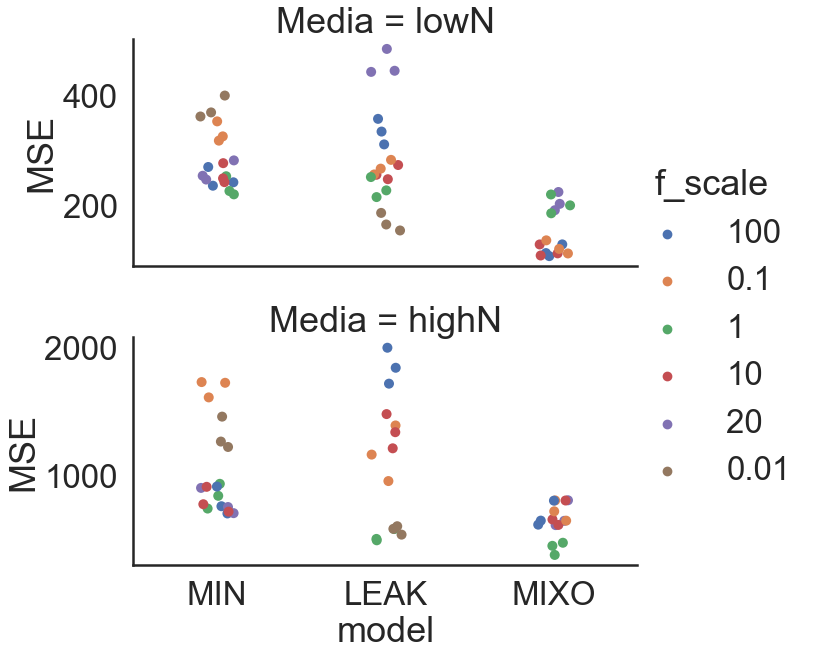

In [119]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    hue='f_scale', y='MSE', aspect=2, x='model', row='Media', 
    sharey=False, s=10, #kind='violin', dodge=False
)

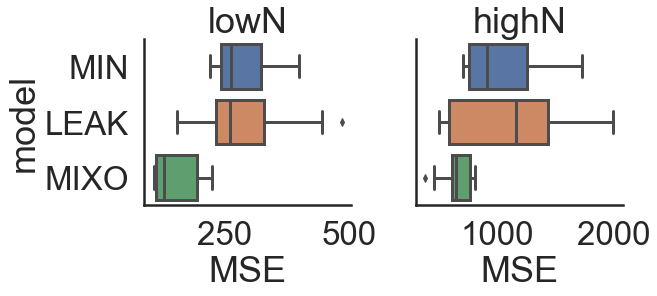

In [123]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    y='model', x='MSE', aspect=1, col='Media',kind='box', dodge=False, sharex=False
).set_titles(col_template='{col_name}')

In [62]:
refdf.dtypes

day             float64
Sample           object
id                int64
replicate        object
transfer          int64
transfer day      int64
heterotroph      object
full name        object
FL              float64
Group            object
predicted       float64
ref_Bp          float64
LOD                bool
t               float64
dtype: object

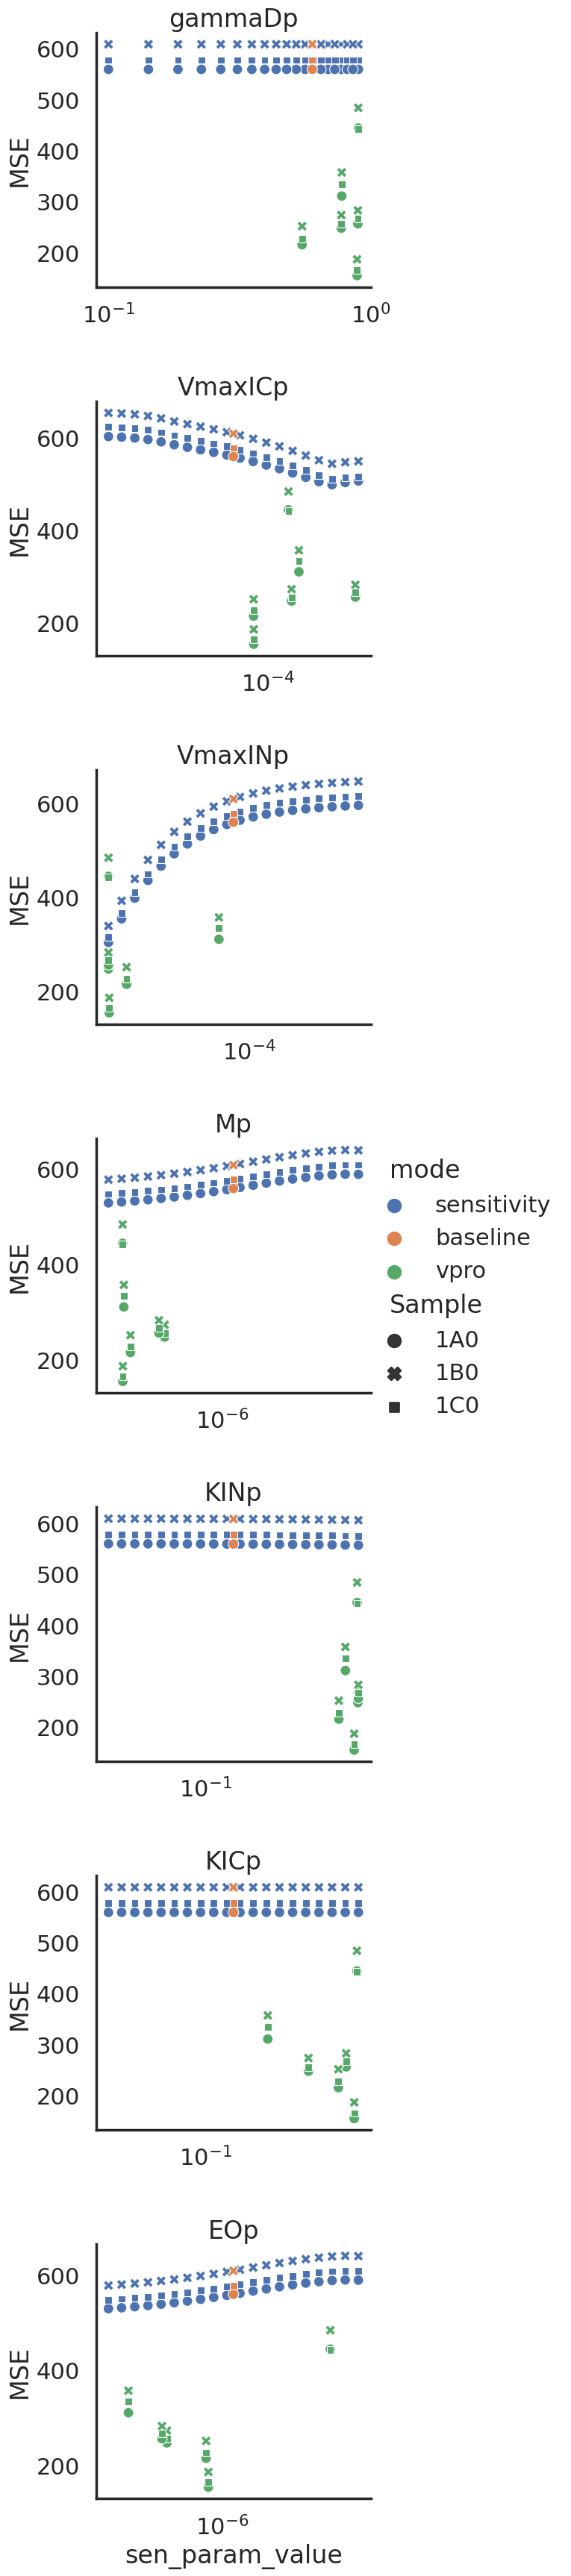

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

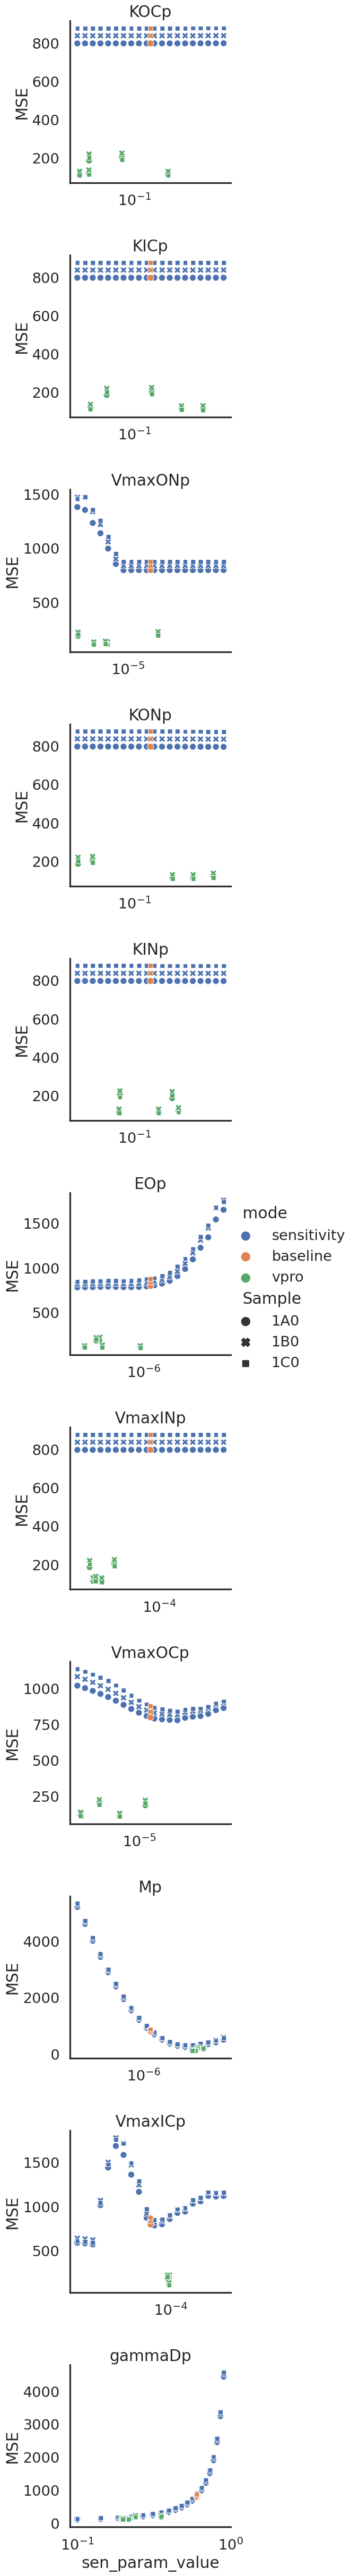

In [64]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [65]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      27
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [66]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

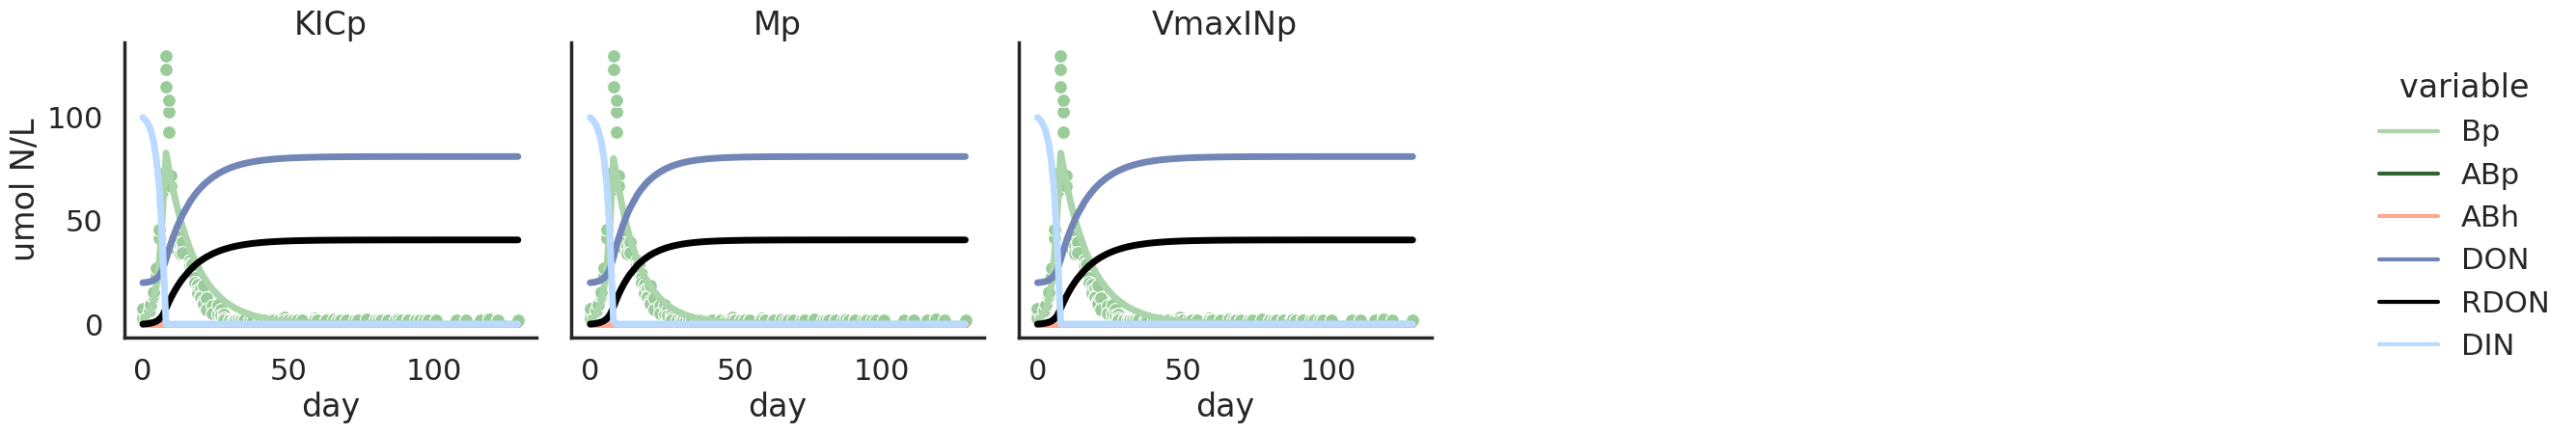

In [67]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [68]:
plt.show()

In [69]:
lowest_ids

933     param_sensitivity_ponly_MIN_Mp_10_h-6350224087...
2337    param_sensitivity_ponly_MIN_Mp_11_h-4005430513...
141     param_sensitivity_ponly_MIN_KICp_0_h-276366306...
1755    param_sensitivity_ponly_MIN_KICp_1_h5817399541...
261     param_sensitivity_ponly_MIN_KICp_2_h-587032821...
1359    param_sensitivity_ponly_MIN_KICp_3_h-642780311...
1599    param_sensitivity_ponly_MIN_KICp_4_h4268934620...
612     param_sensitivity_ponly_MIN_KICp_5_h2091062636...
2169    param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...
1632    param_sensitivity_ponly_MIN_KICp_6_h-181862465...
Name: run_id, dtype: object